# Advanced CNN for Attribute Classification on CelebA (Chapter 14) 🧑‍🎤

---

This notebook tackles a complex, real-world image task—**Facial Attribute Classification** (e.g., detecting if a person is smiling or wearing glasses) on the **CelebA (Celebrity Attributes)** dataset. It represents a significant leap from MNIST by handling large, high-resolution **color images** and implementing a deep CNN to perform **Binary Classification**. This fully applies the advanced CNN concepts from **Chapter 14: Classifying Images with Deep CNNs**.

## 1. Large-Scale Data Pipeline with Advanced Transforms 🎨

Handling the CelebA dataset requires a much more complex data pipeline than MNIST:

* **Dataset Loading:** Uses **`torchvision.datasets.CelebA`** to load the massive dataset and specifies the target attribute (e.g., `target_type='attr'`).
* **Train/Validation/Test Splits:** The notebook confirms the standard data division, often relying on the dataset's built-in splits for training, validation, and testing (as seen in the output counts).
* **Advanced Image Transformations:** To prepare the high-resolution color images for the CNN, essential transformations are applied (likely using `transforms.Compose`):
    * **Resizing/Cropping:** Normalizing the input size (e.g., cropping to the face and resizing to 64x64 or 128x128).
    * **Normalization:** Applying **channel-wise mean and standard deviation** (e.g., `transforms.Normalize`) to the three RGB color channels. This is a crucial practice for color images to center and scale the data properly.
* **Color Input:** The data pipeline is configured to produce Tensors in the **(3, H, W)** format, suitable for the 3-channel input of the CNN.

## 2. Deep CNN Architecture for Color Images 🧱

The model structure is a deeper, more powerful Convolutional Neural Network designed to handle the complexity and size of facial data:

* **Deeper Layer Stacks:** The model features multiple sequential blocks of **`nn.Conv2d`** and **`nn.MaxPool2d`** layers, allowing it to extract increasingly abstract and high-level features from the faces (e.g., edges, then eyes/noses, then expression).
* **Feature Map Management:** The layers are configured to manage the spatial size reduction (pooling) and the expansion of the number of feature maps (channels). 
* **Binary Classification Output:** The final fully connected layer uses **1 output unit**, paired with a final activation (often Sigmoid, or implicitly via the loss function) because the task is a simple Yes/No attribute prediction (e.g., 'Smiling' vs. 'Not Smiling').

## 3. Training and Visualization for Binary Classification

* **Loss Function:** The training uses **`nn.BCEWithLogitsLoss`** (Binary Cross-Entropy Loss with Logits). This is the standard and numerically stable choice for **Binary Classification**, as it works directly on the raw, unnormalized output (logits) of the final layer.
* **Training Loop:** The complete training process is executed, optimizing the network to minimize the binary classification loss.
* **Prediction Visualization:** The notebook concludes with a powerful visualization that confirms the model's performance on a batch of test images:
    * It displays the original face image.
    * It prints the **Ground Truth (GT) label** ('Smile' or 'Not Smile').
    * It shows the model's prediction as a **probability** (e.g., `Pr(Smile)=95%`), demonstrating the network's confidence in its binary decision.

This notebook serves as the ultimate practical demonstration of Chapter 14, showcasing a fully operational, state-of-the-art approach to image classification on complex data.

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.datasets import CelebA

In [2]:
image_path = './'
celeba_train_dataset = CelebA(root= image_path, download= False,
                        split= 'train', target_type= 'attr')
celeba_valid_dataset = CelebA(root= image_path, download= False,
                              split= 'valid', target_type= 'attr')
celeba_test_dataset = CelebA(root= image_path, download= False, 
                             split= 'test', target_type= 'attr')
print(f'Train set counts: {len(celeba_train_dataset)}')
print(f'Validation set counts: {len(celeba_valid_dataset)}')
print(f'Test set counts: {len(celeba_test_dataset)}')

Train set counts: 162770
Validation set counts: 19867
Test set counts: 19962


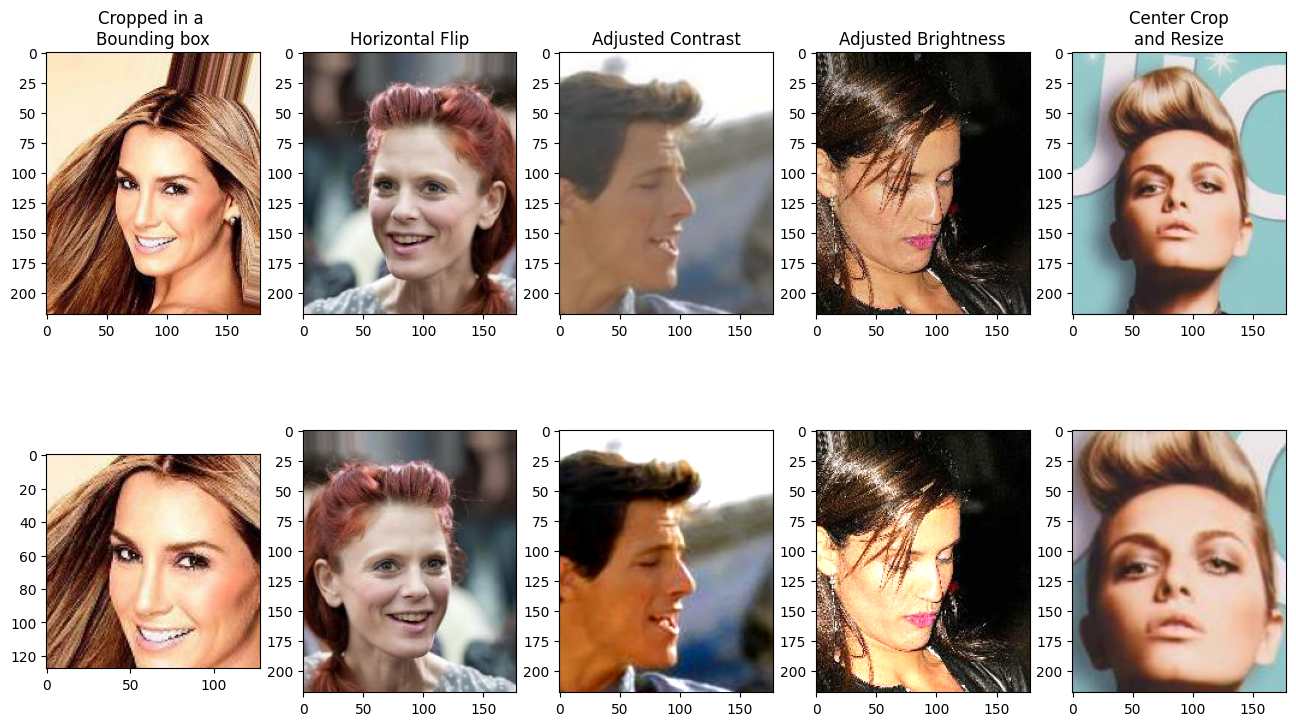

In [3]:
fig = plt.figure(figsize= (16, 9))
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title(f'Cropped in a \nBounding box', size= 12)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = torchvision.transforms.functional.crop(img, 50, 20, 128, 128)
ax.imshow(img_cropped)

ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title(f'Horizontal Flip', size= 12)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_flipped = torchvision.transforms.functional.hflip(img)
ax.imshow(img_flipped)

ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[2]
ax.set_title(f'Adjusted Contrast', size= 12)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_cont = torchvision.transforms.functional.adjust_contrast(img, contrast_factor= 2)
ax.imshow(img_cont)

ax = fig.add_subplot(2, 5, 4)
img, attr = celeba_train_dataset[3]
ax.set_title(f'Adjusted Brightness', size= 12)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 9)
img_brig = torchvision.transforms.functional.adjust_brightness(img, brightness_factor= 1.4)
ax.imshow(img_brig)

ax = fig.add_subplot(2, 5, 5)
img, attr = celeba_train_dataset[4]
ax.set_title(f'Center Crop\nand Resize', size= 12)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 10)
img_cc = torchvision.transforms.functional.center_crop(img, [0.7* 218, 0.7*178])
img_r = torchvision.transforms.functional.resize(img_cc, size= (218, 178))
ax.imshow(img_r)

plt.show()

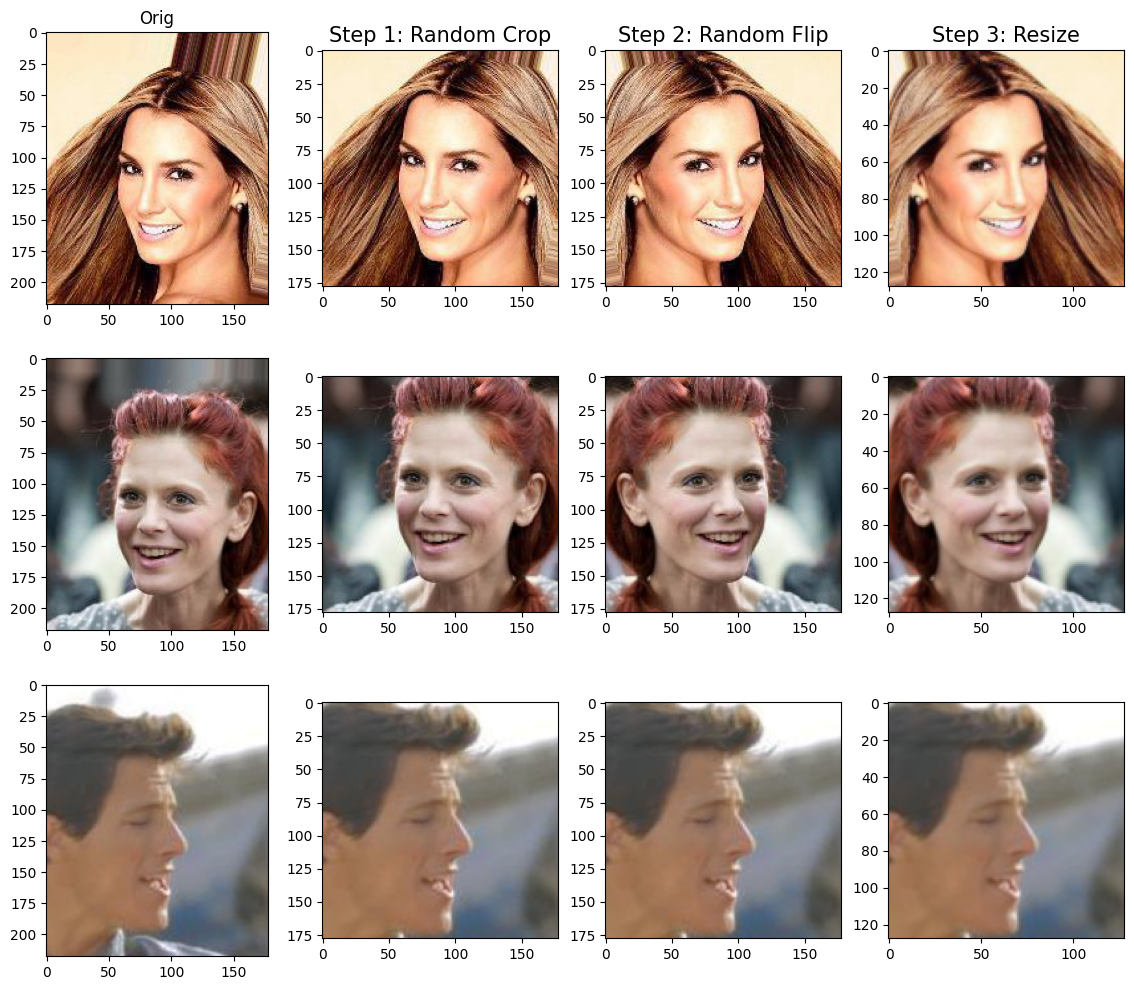

In [4]:
from torchvision import transforms
torch.manual_seed(3)
fig = plt.figure(figsize= (14, 12))
for i, (img, attr) in enumerate(celeba_train_dataset):
    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(img)
    if i == 0:
        ax.set_title('Orig')
        
    ax = fig.add_subplot(3, 4, i*4+2)
    img_transform = transforms.Compose([
        transforms.RandomCrop([178, 178])
    ])
    img_cropped = img_transform(img)
    ax.imshow(img_cropped)
    if i == 0:
        ax.set_title('Step 1: Random Crop', size= 15)
        
    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([
        transforms.RandomHorizontalFlip()
    ])
    img_flip = img_transform(img_cropped)
    ax.imshow(img_flip)
    if i == 0:
        ax.set_title('Step 2: Random Flip', size= 15)
        
    ax = fig.add_subplot(3, 4, i*4+4)
    img_transform = transforms.Compose([
         transforms.Resize(size=(128, 128))
    ])
    img_resized = img_transform(img_flip)
    ax.imshow(img_resized)
    if i == 0:
        ax.set_title('Step 3: Resize', size= 15)
        
    if i == 2:
        break

plt.show()

In [5]:
get_smile = lambda attr: attr[18]

In [6]:
train_transform = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [7]:
transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

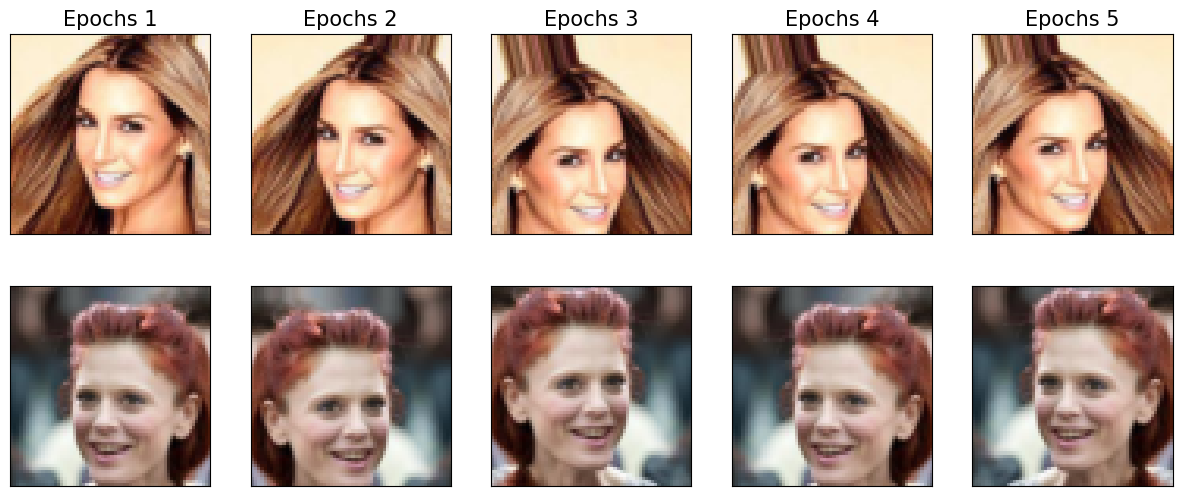

In [9]:
from torch.utils.data import DataLoader
celeb_train_ds = CelebA(root= image_path, download= False, split= 'train', target_type= 'attr',
                        transform= train_transform, target_transform= get_smile
                        )
torch.manual_seed(28)
data_loader = DataLoader(celeb_train_ds, batch_size= 2)

fig = plt.figure(figsize= (15, 6))
num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epochs {j + 1}', size= 15)
    plt.imshow(img.permute(1, 2, 0))
    
    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j+ 6)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img.permute(1, 2, 0))

In [10]:
celeb_valid_ds = CelebA(root= image_path, download= False, split= 'valid',
                        target_type= 'attr', transform= transform, target_transform= get_smile)
celeb_test_ds = CelebA(root= image_path, download= False, split= 'test', 
                       target_type= 'attr', transform= transform, target_transform= get_smile)

In [12]:
from torch.utils.data import Subset
celeb_train_ds = Subset(celeb_train_ds, torch.arange(16000))
celeb_valid_ds = Subset(celeb_valid_ds, torch.arange(1000))
print(f'Number of Training dataset: {len(celeb_train_ds)}\nNumber of Validation dataset: {len(celeb_valid_ds)}')

Number of Training dataset: 16000
Number of Validation dataset: 1000


In [13]:
BATCH_SIZE = 32
torch.manual_seed(28)

train_dl = DataLoader(celeb_train_ds, batch_size= BATCH_SIZE, shuffle= True)
valid_dl = DataLoader(celeb_valid_ds, batch_size= BATCH_SIZE, shuffle= False)
test_dl = DataLoader(celeb_test_ds, batch_size= BATCH_SIZE, shuffle= False)

In [14]:
from torch import nn, optim

In [18]:
model = nn.Sequential()
model.add_module(
    'conv1',
    nn.Conv2d(in_channels= 3, out_channels= 32, kernel_size= 3, padding= 1)
)
model.add_module('relu', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size= 2))
model.add_module('dropout1', nn.Dropout(p= 0.5))
model.add_module(
    'conv2',
    nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size= 3, padding= 1)
)
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size= 2))
model.add_module('dropout2', nn.Dropout(p= 0.5))
model.add_module(
    'conv3',
    nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= 3, padding= 1)
)
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size= 2))
model.add_module(
    'conv4',
    nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size= 3, padding= 1)
)
model.add_module('relu4', nn.ReLU())

In [19]:
x = torch.ones((32, 3, 64, 64))
model(x).shape

torch.Size([32, 256, 8, 8])

In [20]:
model.add_module('pool4', nn.AvgPool2d(kernel_size= 8))
model.add_module('flatten', nn.Flatten())
x = torch.ones((32, 3, 64, 64))
model(x).shape

torch.Size([32, 256])

In [21]:
model.add_module('fc', nn.Linear(256, 1))
model.add_module('sigmoid', nn.Sigmoid())
x = torch.ones((32, 3, 64, 64))
model(x).shape

torch.Size([32, 1])

In [22]:
model

Sequential(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): AvgPool2d(kernel_size=8, stride=8, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [28]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [35]:
def train(model, num_epochs, train_dl, valid_dl):
    hist_train_loss = [0] * num_epochs
    hist_val_loss = [0] * num_epochs
    hist_train_acc = [0] * num_epochs
    hist_val_acc = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            hist_train_loss[epoch] += loss.item() * y_batch.size(0)
            is_correct = ((pred>0.5).float() == y_batch).float()
            hist_train_acc[epoch] += is_correct.sum()
        hist_train_loss[epoch] /= len(train_dl.dataset)
        hist_train_acc[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                hist_val_loss[epoch] += loss.item() * y_batch.size(0)
                is_correct = ((pred>0.5).float() == y_batch).float()
                hist_val_acc[epoch] += is_correct.sum()
            hist_val_loss[epoch] /= len(valid_dl.dataset)
            hist_val_acc[epoch] /= len(valid_dl.dataset)
            
        print(f'Epoch {epoch + 1} Accuracy: {hist_train_acc[epoch]:.4f}\tValidation Accuracy: {hist_val_acc[epoch]:.4f}')
        
    return hist_train_loss, hist_val_loss, hist_train_acc, hist_val_acc
        

In [36]:
torch.manual_seed(28)
num_epochs = 30
history = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 Accuracy: 0.6998	Validation Accuracy: 0.7270
Epoch 2 Accuracy: 0.7259	Validation Accuracy: 0.7540
Epoch 3 Accuracy: 0.7421	Validation Accuracy: 0.7640
Epoch 4 Accuracy: 0.7494	Validation Accuracy: 0.7320
Epoch 5 Accuracy: 0.7600	Validation Accuracy: 0.7820
Epoch 6 Accuracy: 0.7724	Validation Accuracy: 0.7770
Epoch 7 Accuracy: 0.7780	Validation Accuracy: 0.7990
Epoch 8 Accuracy: 0.7920	Validation Accuracy: 0.8070
Epoch 9 Accuracy: 0.8043	Validation Accuracy: 0.8140
Epoch 10 Accuracy: 0.8231	Validation Accuracy: 0.8530
Epoch 11 Accuracy: 0.8319	Validation Accuracy: 0.8460
Epoch 12 Accuracy: 0.8414	Validation Accuracy: 0.8410
Epoch 13 Accuracy: 0.8476	Validation Accuracy: 0.8640
Epoch 14 Accuracy: 0.8564	Validation Accuracy: 0.8580
Epoch 15 Accuracy: 0.8512	Validation Accuracy: 0.8540
Epoch 16 Accuracy: 0.8574	Validation Accuracy: 0.8430
Epoch 17 Accuracy: 0.8600	Validation Accuracy: 0.8640
Epoch 18 Accuracy: 0.8649	Validation Accuracy: 0.8760
Epoch 19 Accuracy: 0.8677	Validation 

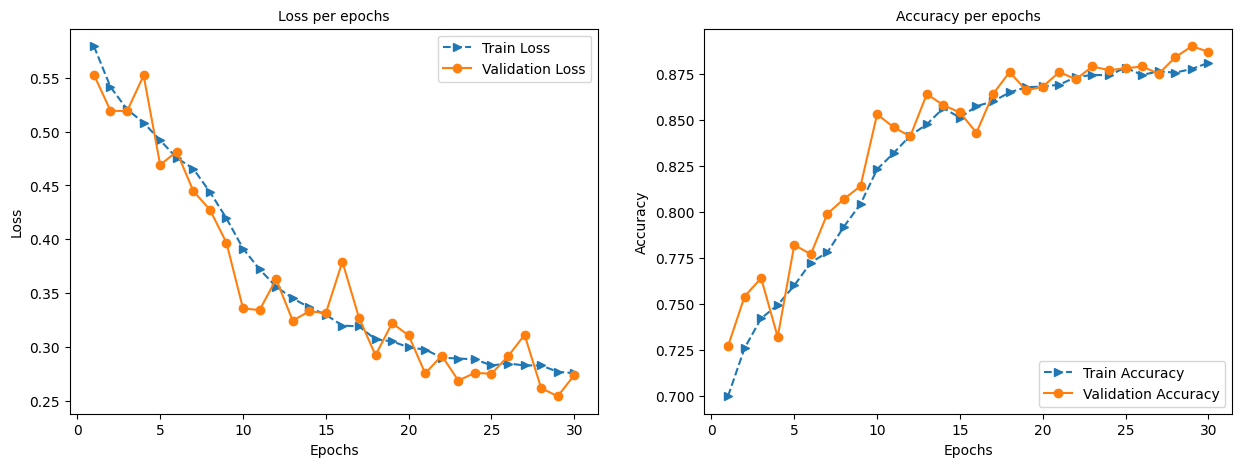

In [39]:
x_arr = torch.arange(len(history[0])) + 1
fig, axs = plt.subplots(1, 2, figsize= (15, 5))
axs[0].plot(x_arr, history[0], '-->', label= 'Train Loss')
axs[0].plot(x_arr, history[1], '-o', label= 'Validation Loss')
axs[0].set_title('Loss per epochs', fontsize= 10)
axs[0].legend(loc= 'upper right', fontsize= 10)
axs[0].set_xlabel('Epochs', fontsize= 10)
axs[0].set_ylabel('Loss', fontsize= 10)

axs[1].plot(x_arr, history[2], '-->', label= 'Train Accuracy')
axs[1].plot(x_arr, history[3], '-o', label= 'Validation Accuracy')
axs[1].set_title('Accuracy per epochs', fontsize= 10)
axs[1].legend(loc= 'lower right', fontsize= 10)
axs[1].set_xlabel('Epochs', fontsize= 10)
axs[1].set_ylabel('Accuracy', fontsize= 10)

plt.show()

In [41]:
acc_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>0.5) == y_batch).float()
        acc_test += is_correct.sum()
acc_test /= (len(test_dl.dataset))
print(f'Accuracy achived on Test set: {acc_test:.4f}')

Accuracy achived on Test set: 0.8690


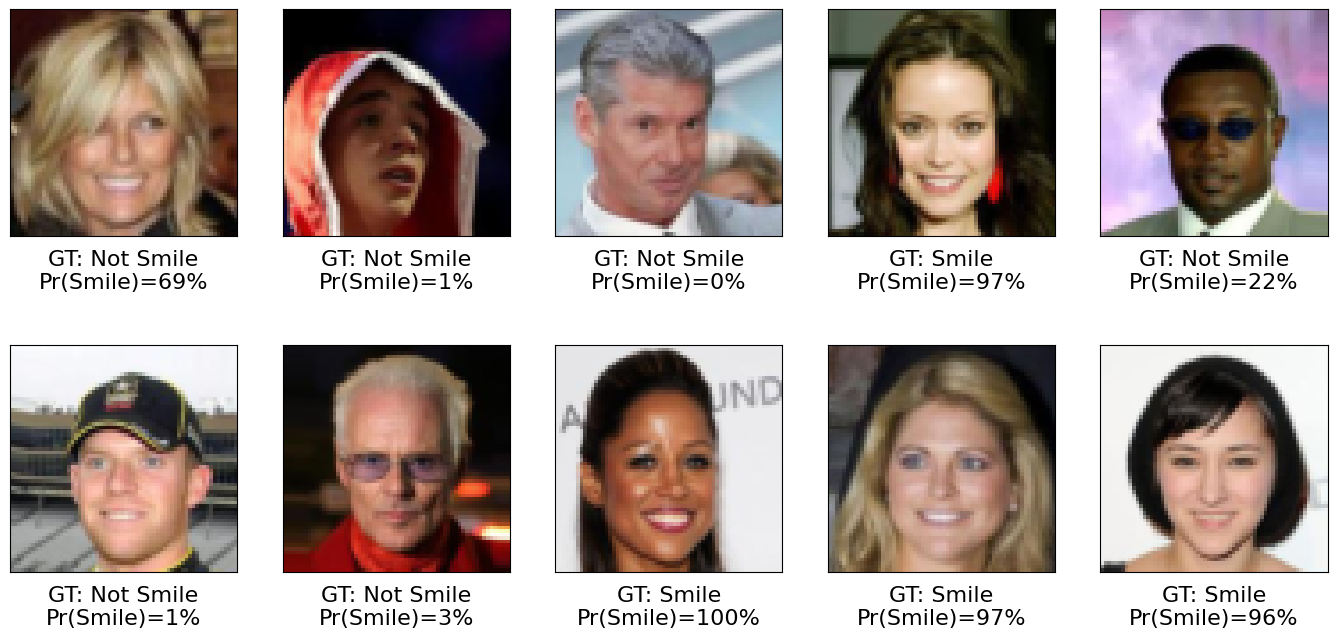

In [44]:
pred = model(x_batch)[:, 0] * 100
fig = plt.figure(figsize= (17, 8))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x_batch[j].permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Smile'
    else:
        label = 'Not Smile'
    ax.text(
        0.5, -0.15,
        f'GT: {label:s}\nPr(Smile)={pred[j]:.0f}%',
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes
    )
plt.show()